In [32]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [33]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2,3],[4,5,6,7],[8,9,10,11],
            [12,13,14,15],[0,4,8,12],[1,5,9,13],
            [2,6,10,14],[3,7,11,15],[0,5,10,15],[3,6,9,12]]
    
    for i in range(10):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1 and 
            configuration[wins[i][3]] == 1):
            return 1
    
    for i in range(10):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 and 
            configuration[wins[i][3]] == 2):
            return -1
    return 0

In [34]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [35]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [36]:
# for the mc agent to selects action based on the Q value
def mc_select_action(state,act_choices,q):
    act_chosen=-1
    q_val=-1000.0
    for act in act_choices:
        if (q[state][act]!=0 and q[state][act]>q_val):
            q_val=q[state][act]
            act_chosen=act
    if (act_chosen<0):
        act_chosen = random.choice(act_choices)
        
    return act_chosen

In [37]:
#agent is playing based on the trained q values
def play_using_q(q):
    global win_list, loss_list, tie_list
    wins = 0 
    loss = 0 
    tie = 0 
    
    for i in range(1000):
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            if (player==1):
                action = mc_select_action(state_to_key(state),action_choices,q) 
            else:
                action = random.choice(action_choices) 
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player)  
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
    win_list.append(wins)
    loss_list.append(loss)
    tie_list.append(tie)
    print("    Win : ", wins, "Loss : ", loss, "Ties : ", tie)

In [38]:
#training function under 1 million episodes
def monte_carlo_control(pi,Q,Counts):
    global x_axis
    episode=[]
    for i in range(1000001):
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        episode=[]
        rewards=[]
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            state_key=state_to_key(state)
            action =  random.choice(action_choices)
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player) 
            episode.append((state_key,action))
            rewards.append(reward)
            state=new_state
            
        G=0
        for j,(s,a) in enumerate(reversed(episode)):
            ind_frw=len(rewards)-j-1
            reward=rewards[ind_frw]
            G+=reward
            if (s,a) not in episode[:ind_frw]:
                Counts[s][a] += 1
                Q[s][a] += (G-Q[s][a])/Counts[s][a]

        if (i>0 and (i%100000==0 or i==5 or i==1000 or i==5000)):
            print("After ",i," episodes: ")
            x_axis.append(i)
            play_using_q(Q)

In [39]:
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
pi = np.zeros([3**16,16])
Counts = np.zeros([3**16,16])
Q = np.zeros([3**16,16])
myQ=monte_carlo_control(pi,Q,Counts)

After  5  episodes: 
    Win :  294 Loss :  278 Ties :  428
After  1000  episodes: 
    Win :  322 Loss :  233 Ties :  445
After  5000  episodes: 
    Win :  337 Loss :  273 Ties :  390
After  100000  episodes: 
    Win :  331 Loss :  292 Ties :  377
After  200000  episodes: 
    Win :  343 Loss :  244 Ties :  413
After  300000  episodes: 
    Win :  335 Loss :  258 Ties :  407
After  400000  episodes: 
    Win :  343 Loss :  244 Ties :  413
After  500000  episodes: 
    Win :  339 Loss :  267 Ties :  394
After  600000  episodes: 
    Win :  345 Loss :  263 Ties :  392
After  700000  episodes: 
    Win :  352 Loss :  281 Ties :  367
After  800000  episodes: 
    Win :  333 Loss :  268 Ties :  399
After  900000  episodes: 
    Win :  386 Loss :  246 Ties :  368
After  1000000  episodes: 
    Win :  381 Loss :  251 Ties :  368


[294, 322, 337, 331, 343, 335, 343, 339, 345, 352, 333, 386, 381]
[278, 233, 273, 292, 244, 258, 244, 267, 263, 281, 268, 246, 251]
[428, 445, 390, 377, 413, 407, 413, 394, 392, 367, 399, 368, 368]
[5, 1000, 5000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


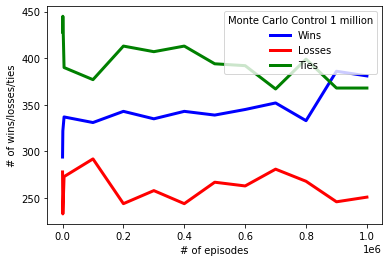

In [42]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Monte Carlo Control 1 million')
plt.xlabel("# of episodes")
plt.ylabel("# of wins/losses/ties")
plt.show()